## 【题目1】 编程实现线性回归从零开始实现。

### 第一步，导入相关包、生成数据集

In [1]:
import random
import torch
from d2l import torch as d2l
def synthetic_data(w,b,num_examples):
    "生成y=X2+b+噪声"
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

torch.Size([1000, 2])
torch.Size([1000, 1])


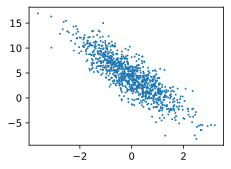

In [2]:
#随机生成直线周围符合正太分布的1000个散点，并进行可视化。
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
print(features.shape)
print(labels.shape)

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)
d2l.plt.show()

In [3]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]

In [4]:
#第三步，定义线性回归模型、均方损失函数以及SGD优化器
def linreg(X,w,b):
    '''线性回归模型'''
    return torch.matmul(X,w)+b

def squared_loss(y_hat,y):
    '''均方损失'''
    return (y_hat-y.reshape(y_hat.shape))**2/2

def sgd(params,lr,batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [5]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

lr = 0.03
num_epochs = 3
batch_size = 10

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = squared_loss(linreg(X,w,b),y) #X和y的小批量损失
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = squared_loss(linreg(features,w,b),labels)
        print(f"epoch {epoch+1},loss{float(train_l.mean()):f}")

epoch 1,loss0.028438
epoch 2,loss0.000096
epoch 3,loss0.000047


### 【题目2】 编程理解ReLu，Sigmoid，Tanh函数

In [6]:
#relu
import torch
from matplotlib import pyplot as plt
x = torch.arange(-8,8,0.1,requires_grad=True)

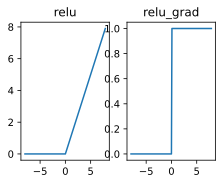

In [7]:

y = torch.relu(x)

plt.subplot(121),plt.title('relu'),plt.plot(x.detach(),y.detach())
y.backward(torch.ones_like(x))
plt.subplot(122),plt.title('relu_grad'),plt.plot(x.detach(),x.grad)
plt.show()

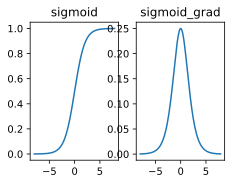

In [8]:
#sigmoid
x = torch.arange(-8,8,0.1,requires_grad=True)
y = torch.sigmoid(x)
plt.subplot(121),plt.title('sigmoid'),plt.plot(x.detach(),y.detach())
y.backward(torch.ones_like(x))
plt.subplot(122),plt.title('sigmoid_grad'),plt.plot(x.detach(),x.grad)
plt.show()

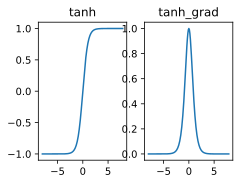

In [9]:
#tanh
x = torch.arange(-8,8,0.1,requires_grad=True)
y = torch.tanh(x)
plt.subplot(121),plt.title('tanh'),plt.plot(x.detach(),y.detach())
y.backward(torch.ones_like(x))
plt.subplot(122),plt.title('tanh_grad'),plt.plot(x.detach(),x.grad)
plt.show()

【题目3】 编程实现多层感知器从零开始实现

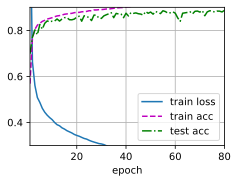

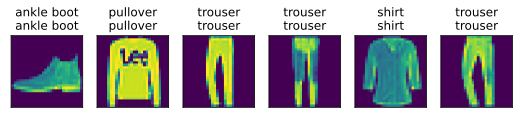

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from matplotlib import pyplot as plt


def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)


def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return H @ W2 + b2


if __name__ == '__main__':
    # 1.initialize weight and bias
    num_inputs, num_outputs, num_hiddens1, num_hiddens2, num_hiddens3 = 784, 10, 256, 128, 64

    W1 = nn.Parameter(torch.randn(
        num_inputs, num_hiddens1, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens1, requires_grad=True))
    W2 = nn.Parameter(torch.randn(
        num_hiddens1, num_hiddens2, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_hiddens2, requires_grad=True))
    W3 = nn.Parameter(torch.randn(
        num_hiddens2, num_hiddens3, requires_grad=True) * 0.01)
    b3 = nn.Parameter(torch.zeros(num_hiddens3, requires_grad=True))
    W4 = nn.Parameter(torch.randn(
        num_hiddens3, num_outputs, requires_grad=True) * 0.01)
    b4 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

    params = [W1, b1, W2, b2, W3, b3, W4, b4]

    # 2.hyper-parameters
    batch_size = 256
    num_epochs, lr = 80, 0.08
    loss = nn.CrossEntropyLoss(reduction='none')
    updater = torch.optim.SGD(params, lr=lr)

    # 3.load dataset
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    # 4.training and visualization
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

    d2l.predict_ch3(net, test_iter)
    plt.show()
